<a href="https://colab.research.google.com/github/JDhruvR/ElectronPhotonClassifier/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Clone the repository
!git clone https://github.com/JDhruvR/ElectronPhotonClassifier.git

# Change directory to the cloned repo
%cd ElectronPhotonClassifier

Cloning into 'ElectronPhotonClassifier'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 131 (delta 60), reused 101 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (131/131), 326.22 KiB | 1.24 MiB/s, done.
Resolving deltas: 100% (60/60), done.
/content/ElectronPhotonClassifier/ElectronPhotonClassifier


In [28]:
import torch
import torch.optim as optim
import torch.nn as nn

from utils import load_electron_photon_dataset, create_transform, show_image, plot_roc_curve
from models import ResNet15_v1, ResNet15_v2
from train import train, evaluate_model

In [29]:
electron_dataset_path = "/content/drive/MyDrive/cs231n/ElectronPhotonClassifier/data/SingleElectron249k.hdf5"
photon_dataset_path = "/content/drive/MyDrive/cs231n/ElectronPhotonClassifier/data/SinglePhoton249k.hdf5"

In [30]:
train_loader, val_loader, test_loader, transform = load_electron_photon_dataset(
    electron_dataset_path, photon_dataset_path, (0.64, 0.16, 0.20), 512
)

Calculating dataset statistics for normalization...


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  0%|          | 0/4980 [00:00<?, ?it/s]

Dataset statistics - Mean: [0.0012193025322631001, -0.0002637530560605228], Std: [0.023712361231446266, 0.06739004701375961]


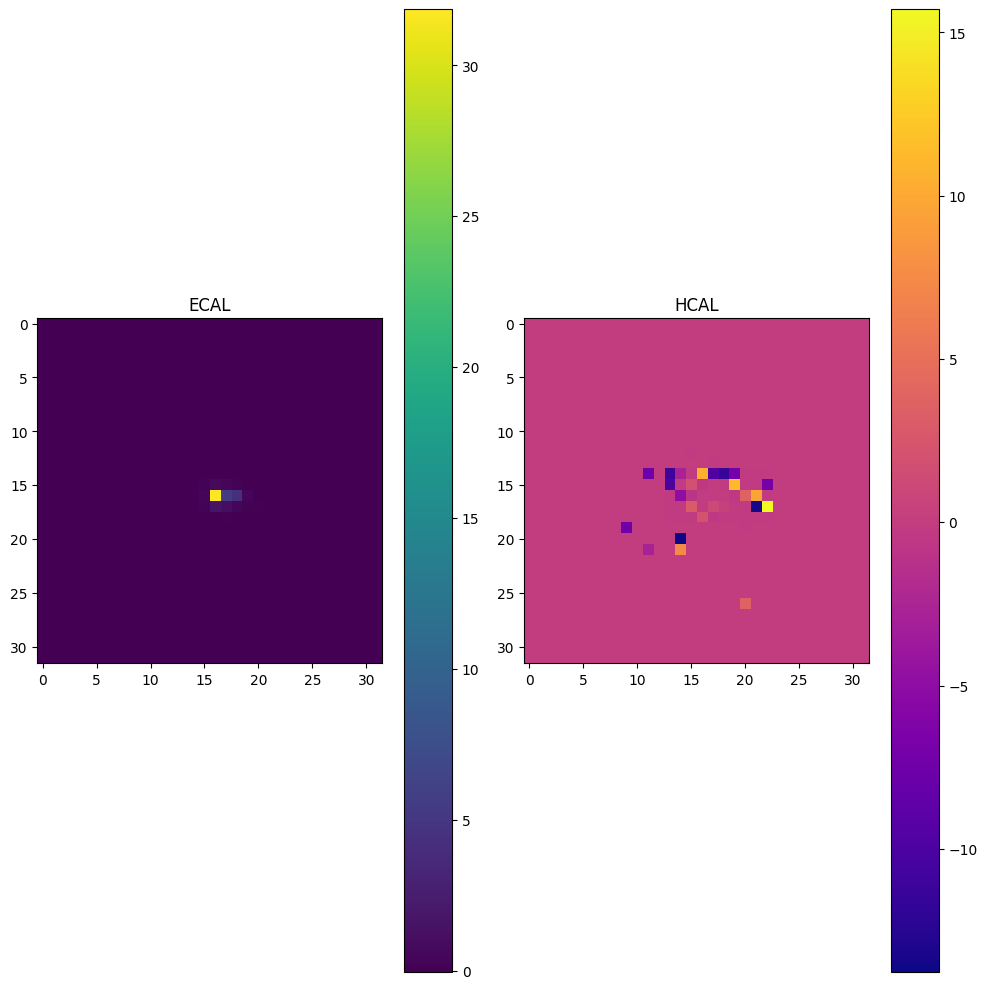

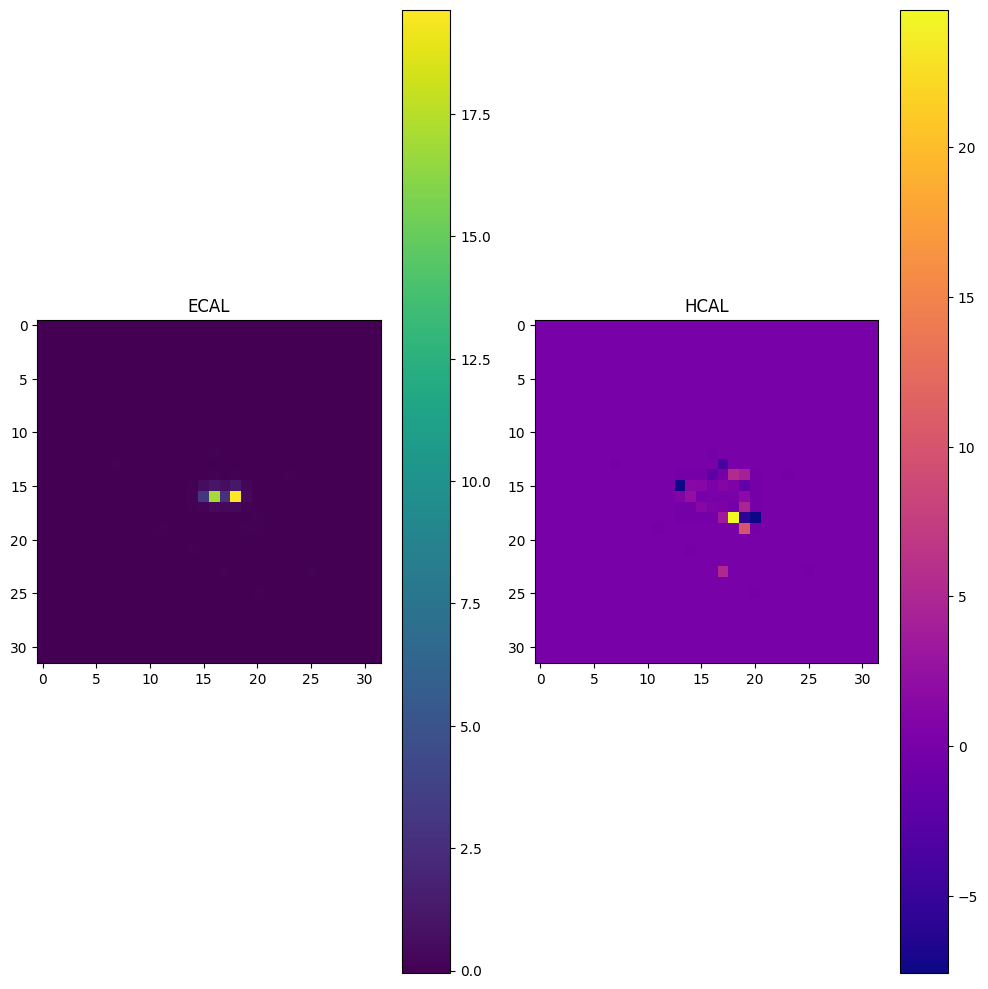

(None, None)

In [31]:
show_image(train_loader.dataset[3][0]), show_image(train_loader.dataset[-3][0])

In [32]:
model = ResNet15_v2()
model.summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]           1,632
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         MaxPool2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 16, 16]           1,056
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 32, 16, 16]           9,248
       BatchNorm2d-9           [-1, 32, 16, 16]              64
             ReLU-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]           2,112
      BatchNorm2d-12           [-1, 64, 16, 16]             128
           Conv2d-13           [-1, 64, 16, 16]           2,112
      BatchNorm2d-14           [-1, 64,

Epoch : 1 / 30: 100%|██████████| 623/623 [01:15<00:00,  8.26it/s]


total_loss: 405.0877251625061, average loss: 0.00127098, accuracy: 62.50, for epoch: 1


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.57it/s]


Loss in validation : 0.00123279, Accuracy : 64.82


Epoch : 2 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.47it/s]


total_loss: 372.69416189193726, average loss: 0.00116935, accuracy: 68.40, for epoch: 2


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.62it/s]


Loss in validation : 0.00114500, Accuracy : 70.07


Epoch : 3 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.55it/s]


total_loss: 356.9737427830696, average loss: 0.00112002, accuracy: 70.84, for epoch: 3


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.04it/s]


Loss in validation : 0.00113717, Accuracy : 69.84


Epoch : 4 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.57it/s]


total_loss: 351.51517674326897, average loss: 0.00110290, accuracy: 71.56, for epoch: 4


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.80it/s]


Loss in validation : 0.00113851, Accuracy : 69.45


Epoch : 5 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.64it/s]


total_loss: 348.54581290483475, average loss: 0.00109358, accuracy: 71.96, for epoch: 5


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.30it/s]


Loss in validation : 0.00113594, Accuracy : 70.56


Epoch : 6 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.61it/s]


total_loss: 346.5894394516945, average loss: 0.00108744, accuracy: 72.12, for epoch: 6


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.38it/s]


Loss in validation : 0.00109912, Accuracy : 72.01


Epoch : 7 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.63it/s]


total_loss: 345.43396747112274, average loss: 0.00108382, accuracy: 72.34, for epoch: 7


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.17it/s]


Loss in validation : 0.00115227, Accuracy : 71.18


Epoch : 8 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.59it/s]


total_loss: 343.79189240932465, average loss: 0.00107866, accuracy: 72.60, for epoch: 8


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.86it/s]


Loss in validation : 0.00109580, Accuracy : 72.22


Epoch : 9 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.56it/s]


total_loss: 343.1533542275429, average loss: 0.00107666, accuracy: 72.61, for epoch: 9


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.52it/s]


Loss in validation : 0.00109164, Accuracy : 72.16


Epoch : 10 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.56it/s]


total_loss: 335.7506539821625, average loss: 0.00105343, accuracy: 73.47, for epoch: 10


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.60it/s]


Loss in validation : 0.00106063, Accuracy : 73.29


Epoch : 11 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.45it/s]


total_loss: 333.89812964200974, average loss: 0.00104762, accuracy: 73.68, for epoch: 11


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.45it/s]


Loss in validation : 0.00105917, Accuracy : 73.32


Epoch : 12 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.51it/s]


total_loss: 333.04540386796, average loss: 0.00104495, accuracy: 73.77, for epoch: 12


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.67it/s]


Loss in validation : 0.00105895, Accuracy : 73.35


Epoch : 13 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.45it/s]


total_loss: 332.2831228375435, average loss: 0.00104255, accuracy: 73.84, for epoch: 13


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.08it/s]


Loss in validation : 0.00105928, Accuracy : 73.31


Epoch : 14 / 30: 100%|██████████| 623/623 [01:15<00:00,  8.29it/s]


total_loss: 331.69315004348755, average loss: 0.00104070, accuracy: 73.88, for epoch: 14


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.55it/s]


Loss in validation : 0.00105765, Accuracy : 73.43


Epoch : 15 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.45it/s]


total_loss: 331.1493487358093, average loss: 0.00103900, accuracy: 73.98, for epoch: 15


evaluating: 100%|██████████| 156/156 [00:10<00:00, 14.26it/s]


Loss in validation : 0.00105901, Accuracy : 73.42


Epoch : 16 / 30: 100%|██████████| 623/623 [01:14<00:00,  8.40it/s]


total_loss: 330.55888864398, average loss: 0.00103715, accuracy: 74.01, for epoch: 16


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.95it/s]


Loss in validation : 0.00105693, Accuracy : 73.49


Epoch : 17 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.42it/s]


total_loss: 328.86140418052673, average loss: 0.00103182, accuracy: 74.19, for epoch: 17


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.32it/s]


Loss in validation : 0.00105523, Accuracy : 73.55


Epoch : 18 / 30: 100%|██████████| 623/623 [01:14<00:00,  8.41it/s]


total_loss: 328.36462566256523, average loss: 0.00103026, accuracy: 74.22, for epoch: 18


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.96it/s]


Loss in validation : 0.00105566, Accuracy : 73.45


Epoch : 19 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.45it/s]


total_loss: 328.12365049123764, average loss: 0.00102950, accuracy: 74.28, for epoch: 19


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.64it/s]


Loss in validation : 0.00105522, Accuracy : 73.45


Epoch : 20 / 30: 100%|██████████| 623/623 [01:14<00:00,  8.34it/s]


total_loss: 328.01470428705215, average loss: 0.00102916, accuracy: 74.28, for epoch: 20


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.72it/s]


Loss in validation : 0.00105504, Accuracy : 73.52


Epoch : 21 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.43it/s]


total_loss: 327.7944234907627, average loss: 0.00102847, accuracy: 74.27, for epoch: 21


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.77it/s]


Loss in validation : 0.00105538, Accuracy : 73.48


Epoch : 22 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.43it/s]


total_loss: 327.6413188278675, average loss: 0.00102799, accuracy: 74.31, for epoch: 22


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.94it/s]


Loss in validation : 0.00105545, Accuracy : 73.46


Epoch : 23 / 30: 100%|██████████| 623/623 [01:14<00:00,  8.41it/s]


total_loss: 327.70564699172974, average loss: 0.00102819, accuracy: 74.32, for epoch: 23


evaluating: 100%|██████████| 156/156 [00:12<00:00, 12.61it/s]


Loss in validation : 0.00105551, Accuracy : 73.47


Epoch : 24 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.52it/s]


total_loss: 327.61303386092186, average loss: 0.00102790, accuracy: 74.34, for epoch: 24


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.14it/s]


Loss in validation : 0.00105529, Accuracy : 73.48


Epoch : 25 / 30: 100%|██████████| 623/623 [01:13<00:00,  8.50it/s]


total_loss: 327.658759534359, average loss: 0.00102805, accuracy: 74.32, for epoch: 25


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.53it/s]


Loss in validation : 0.00105531, Accuracy : 73.47


Epoch : 26 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.61it/s]


total_loss: 327.68135955929756, average loss: 0.00102812, accuracy: 74.35, for epoch: 26


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.47it/s]


Loss in validation : 0.00105537, Accuracy : 73.51


Epoch : 27 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.58it/s]


total_loss: 327.6561697423458, average loss: 0.00102804, accuracy: 74.31, for epoch: 27


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.48it/s]


Loss in validation : 0.00105557, Accuracy : 73.48


Epoch : 28 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.62it/s]


total_loss: 327.6951560676098, average loss: 0.00102816, accuracy: 74.30, for epoch: 28


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.95it/s]


Loss in validation : 0.00105568, Accuracy : 73.45


Epoch : 29 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.63it/s]


total_loss: 327.7100595533848, average loss: 0.00102821, accuracy: 74.28, for epoch: 29


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.43it/s]


Loss in validation : 0.00105529, Accuracy : 73.49


Epoch : 30 / 30: 100%|██████████| 623/623 [01:12<00:00,  8.55it/s]


total_loss: 327.5131265223026, average loss: 0.00102759, accuracy: 74.29, for epoch: 30


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.87it/s]


Loss in validation : 0.00105592, Accuracy : 73.44


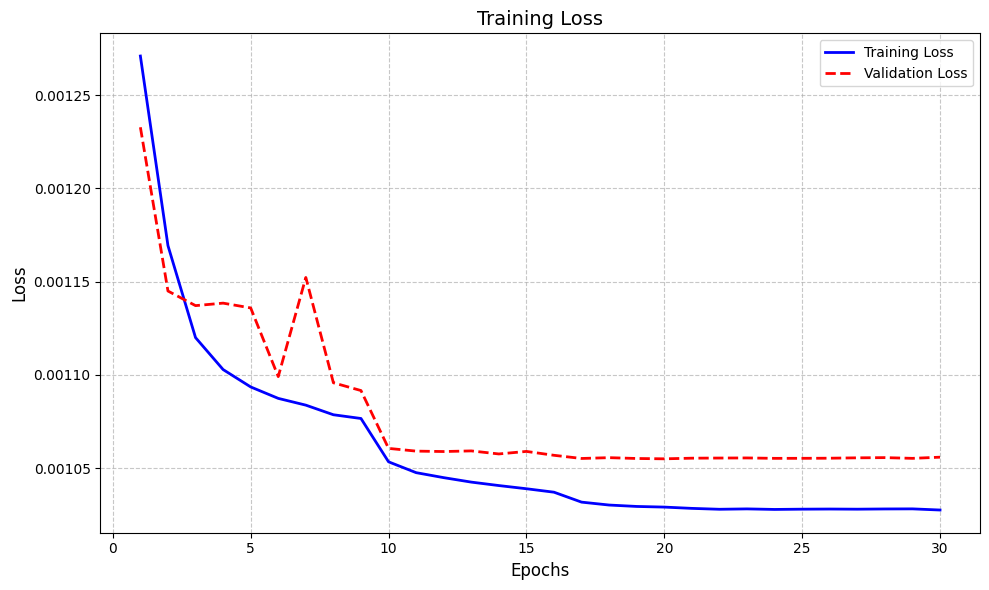

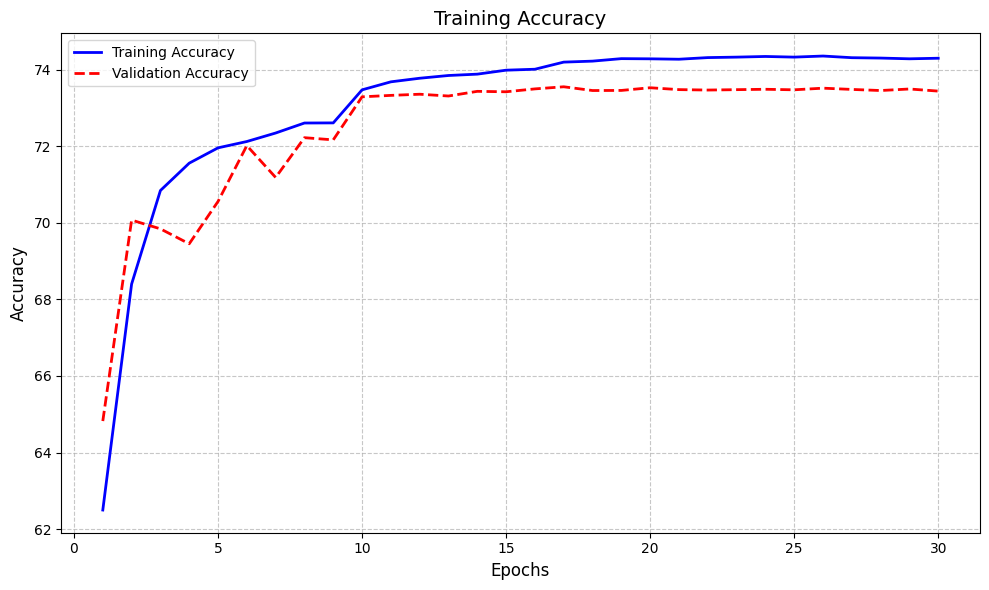

In [33]:
train(
    model=model,
    epochs=30,
    criterion=nn.CrossEntropyLoss(),
    train_loader=train_loader,
    val_loader=val_loader,
    weight_decay=1e-4,
    lr=1e-3,
    device='cuda',
    scheduler_type='plateau'
)

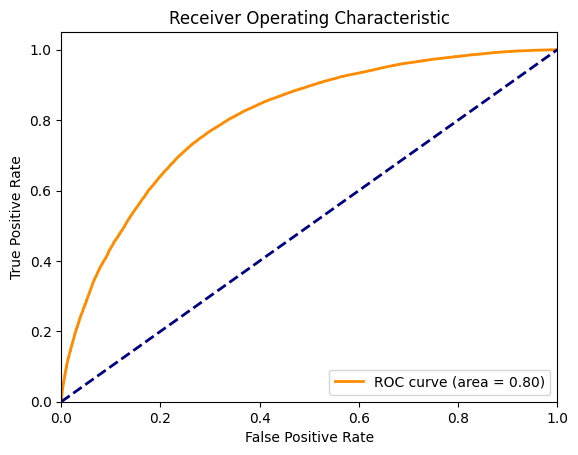

In [34]:
plot_roc_curve(model, val_loader, device='cuda')

In [35]:
torch.save(model.state_dict(), '/content/drive/MyDrive/cs231n/ElectronPhotonClassifier/models/resnet15_v2-3.pth')

Test Time

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [37]:
model = ResNet15_v2().to(device)

In [38]:
model.load_state_dict(torch.load('/content/drive/MyDrive/cs231n/ElectronPhotonClassifier/models/resnet15_v2-3.pth', map_location=device))

<All keys matched successfully>

In [39]:
evaluate_model(model, test_loader, criterion=nn.CrossEntropyLoss(), device=device)

evaluating: 100%|██████████| 195/195 [00:15<00:00, 12.50it/s]

Loss in validation : 0.00106081, Accuracy : 73.39


(tensor(0.0011, device='cuda:0'), 73.38755020080322)

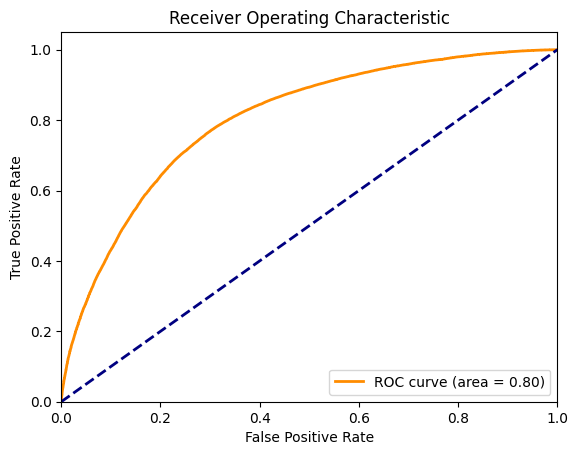

In [40]:
plot_roc_curve(model, test_loader)